### Problem 9

Consider the system
$$ x_{k+1} = x_k + u_k w_k, \quad k = 0, 1, 2, ... , 9, $$
with initial state $x_0$ being an integer and constrained to $0 \leq x_0 \leq 10$. The control constraint set is given by $U_k (x_k) := \{u | 0 \leq x_k + u \leq 10, u \in \mathbb{Z}\}$ for all $x_k$ and $k$, and the disturbance $w_k$ takes the value $1$ with probability $\frac{1}{3}$ and the value $0$ with probability $\frac{2}{3}$ for all $x_k$ and $u_k$. The cost function is
$$x_{10}^2 + \sum_{k=0}^{9} (x_k -x_{ref}(k))^2 + u_k^2$$
with $x_{ref}(k) = (k-5)^5$. Implement a MATLAB or a Python script that computes the optimal
cost $J_0 (x_0)$ for all initial states $0 \leq x_0 \leq 10$, by applying the DP algorithm.

## Algorithm

Terminal cost: $$J_{10}(x_{10}) = g_{10}(x_{10}) = x_{10}^2$$

Stage cost: $$g_k(x_k, u_k) = (x_k -x_{ref}(k))^2 + u_k^2 = (x_k -(k-5)^2)^2 + u_k^2$$

Iteration: $$J_{k}(x_{k}) = \min_{u_k \in U_k(x_k)} \mathbb{E}_{w_k} (g_k(x_k, u_k) + J_{k+1}(x_k+u_k w_k)) = \min_{u_k \in U_k(x_k)} \frac{1}{3} (g_k(x_k, u_k) + J_{k+1}(x_k+u_k)) + \frac{2}{3} (g_k(x_k, u_k) + J_{k+1}(x_k)) = \min_{u_k \in U_k(x_k)} g_k(x_k, u_k) + \frac{1}{3} J_{k+1}(x_k+u_k) + \frac{2}{3} J_{k+1}(x_k)$$

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

In [73]:
# Possible state manifestation, time-steps
pos_states: list = list(range(0,10+1))
time_steps: list = list(range(0,10+1))

# Cost to go for each time-step and each possible state manifestation
cost_to_go = np.zeros((len(pos_states), len(time_steps)))
policy = np.zeros((len(pos_states), len(time_steps) - 1))

# Terminal cost (last time-step) for each state manifestation
termination_time = time_steps[-1]
for x_last in pos_states:
    cost_to_go[(x_last, termination_time)] = x_last**2

# Iterate backwards through time
T = time_steps.copy()
T.pop()
for k in reversed(T):
    # Find minimal cost_to_go and policy for each state manifestation
    for x_k in pos_states:
        legal_u_k = list(range(-x_k,10-x_k+1))
        optimal_u_k = 0
        minimal_cost_to_go = np.inf
        for u_k in legal_u_k:
            x_ref = (k-5)**2
            g_k = (x_k - x_ref)**2 + u_k**2
            cost = g_k + (1/3) * cost_to_go[x_k + u_k, k+1] + (2/3) * cost_to_go[x_k, k+1]
            if cost < minimal_cost_to_go:
                minimal_cost_to_go = cost
                optimal_u_k = u_k
        cost_to_go[x_k, k] = minimal_cost_to_go
        policy[x_k, k] = optimal_u_k

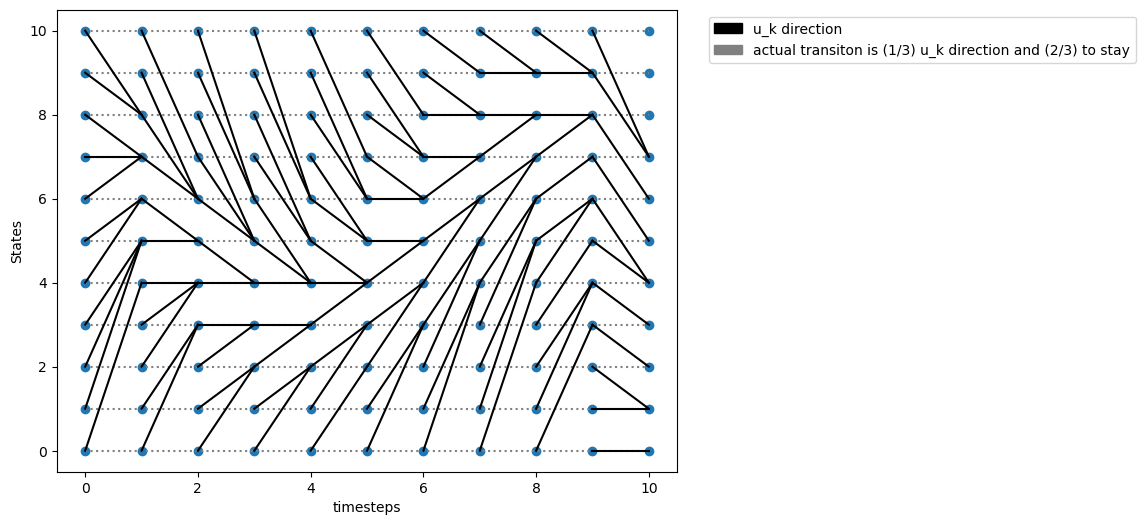

In [94]:
# Create a grid of points
X, Y = np.meshgrid(time_steps, pos_states)
plt.figure(figsize=(8, 6))
plt.scatter(X, Y)

# Plot possible transitions
for x_k in pos_states:
    plt.plot([time_steps[0], time_steps[-1]], [x_k, x_k], color='grey', linestyle=':')

# Plot policy
for k in T:
    for x_k in pos_states:
        A = (k, x_k)
        B = (k+1, policy[x_k, k]+x_k)
        plt.plot([A[0], B[0]], [A[1], B[1]], color='black')


plt.xlim(time_steps[0]-.5, time_steps[-1]+.5)  # Setting limits for x-axis
plt.ylim(pos_states[0]-.5, pos_states[-1]+.5)  # Setting limits for y-axis
plt.xlabel("timesteps")
plt.ylabel("States")
x_u_k_patch = mpatches.Patch(
    color="black", label="u_k direction"
)
x_transition_patch = mpatches.Patch(
    color="grey", label="actual transiton is (1/3) u_k direction and (2/3) to stay"
)
plt.legend(
    handles=[x_u_k_patch, x_transition_patch],
    loc="upper left",
    bbox_to_anchor=(1.04, 1),
)
plt.show()